### Dataset description

This dataset contains information about Sales Values in Dollars on American Stores between 2010 and 2011. In particular, this dataset contains:

Stores' Area, State, Region and Size;
Products' ID, Description, Type, Category and Sale Date;
Accounting Info, such as Budget Margin, Profit, Total Expenses and Marking.

The data was extracted between January 1th in 2010 and December 31th in 2011.

### Variables description

* **Area Code:** Store's Code;
* **State:** Store's State;
* **Market:** Store's Region;
* **Market Size:** Store's Size;
* **Profit:** Profits in Dollars `($)`;
* **Margin:** Profit + Total Expenses `($)` OR Sales - COGS `($)`;
* **Sales:** Values Acquired in Sales `($)`;
* **COGS:** Cost of Goods Sold `($)`;
* **Total Expenses:** Total Expenses to get the Product to Sell `($)`;
* **Marketing:** Expenses in Marketing `($)`;
* **Inventory:** Inventory Value of the Product in the Sale Moment `($)`;
* **Budget Profit:** Expected Profit `($)`;
* **Budget COGS:** Expected COGS `($)`;
* **Budget Margin:** Expected Profit + Expected Total Expenses `($)` OR Expected Sales - Expected COGS `($)`;
* **Budget Sales:** Expected Value Acquired in Sales `($)`;
* **ProductID:** Product ID;
* **Date:** Sale Date;
* **Product Type:** Product Category;
* **Product**: Product Description;
* **Type:** Type;

### Imports

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fast_ml.model_development import train_valid_test_split
import itertools as it
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import random
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


random.seed(1)



### Load the data

In [139]:
full_df = pd.read_csv("sales.csv")

### Show basic information about the dataset

In [140]:
full_df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [141]:
full_df.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
dtype: object

In [142]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

As we can see, 'Product', 'Profit', 'Margin' features are calculated based on each other, so there is no need to keep them in the dataset. Also, 'ProductId' is just a product identification, so it won't have any influence on our prediction. Similarly, 'Budget Profit', 'Budget COGS', 'Budget Margin' and 'Budget Sales' are referring to the future based on actual results, they won't be taken to the model. The Date column will be dropped because it cannot be analyzed due to legal issues.

In [143]:
columns_to_drop=['Product', 'Profit', 'Margin','Budget Profit', 'Budget COGS', 'Budget Margin','Budget Sales','ProductId', 'Date']
df = full_df.drop(columns_to_drop, axis=1).copy()
df.head()

,Area Code,State,Market,Market Size,Sales,COGS,Total Expenses,Marketing,Inventory,Product Type,Type
0,203,Connecticut,East,Small Market,292.0,116.0,69.0,38.0,962.0,Coffee,Regular
1,203,Connecticut,East,Small Market,225.0,90.0,60.0,29.0,1148.0,Coffee,Regular
2,203,Connecticut,East,Small Market,325.0,130.0,73.0,42.0,1134.0,Coffee,Regular
3,203,Connecticut,East,Small Market,289.0,115.0,69.0,37.0,1166.0,Coffee,Regular
4,203,Connecticut,East,Small Market,223.0,90.0,56.0,29.0,1148.0,Coffee,Regular


Data types are mostly of type "object" although most of them are in fact of type "category" (State, Market, Market Size, Product Type, Product, Type) one is a Timestamp (Date). Therefore, in the next step the data type will be changed. 

In [144]:
df[['Area Code', 'State', 'Market', 'Market Size', 'Product Type',  'Type']] = df[['Area Code', 'State', 'Market', 'Market Size', 'Product Type', 'Type']].apply(lambda x: x.astype('category'))


### Missing data

In [145]:
df.isnull().sum() #for the whole trainset check null values

Area Code         0
State             0
Market            0
Market Size       0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Product Type      0
Type              0
dtype: int64

### Plots

#### Categorical variables


<AxesSubplot: >

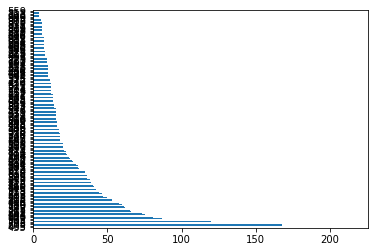

In [146]:
df['Area Code'].value_counts().plot(kind='barh')

<AxesSubplot: >

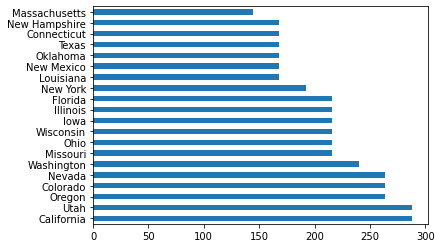

In [147]:
df['State'].value_counts().plot(kind='barh')

<AxesSubplot: >

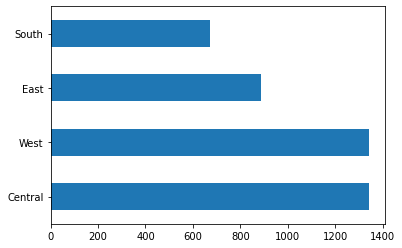

In [148]:
df['Market'].value_counts().plot(kind='barh')

<AxesSubplot: >

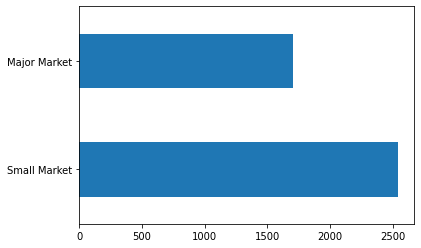

In [149]:
df['Market Size'].value_counts().plot(kind='barh')

<AxesSubplot: >

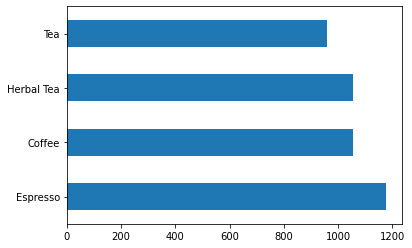

In [150]:
df['Product Type'].value_counts().plot(kind='barh')

<AxesSubplot: >

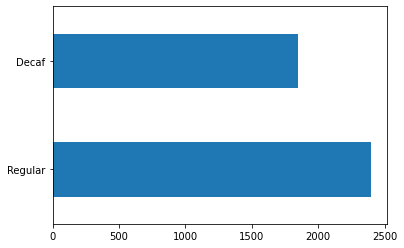

In [151]:
df['Type'].value_counts().plot(kind='barh')

#### Continuous variables


<Figure size 432x288 with 0 Axes>

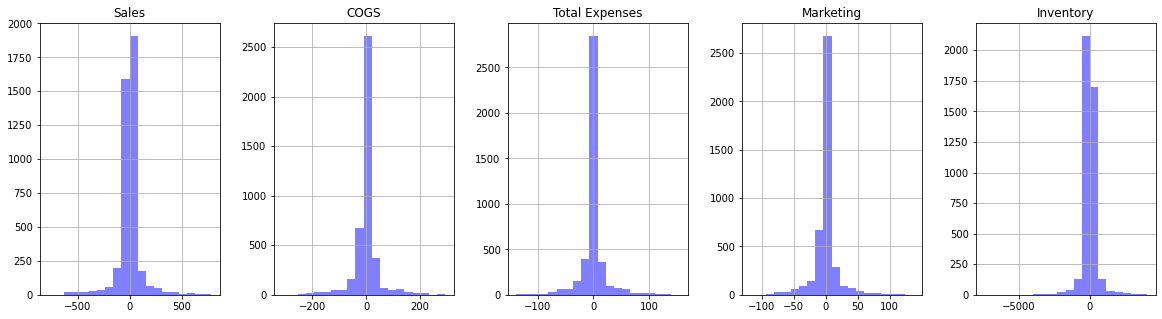

In [152]:
plt.figure();
df[['Sales', 'COGS', 'Total Expenses','Marketing','Inventory']].diff().hist(color="b", alpha=0.5, bins=20, layout=(1,5), figsize=(20,5));


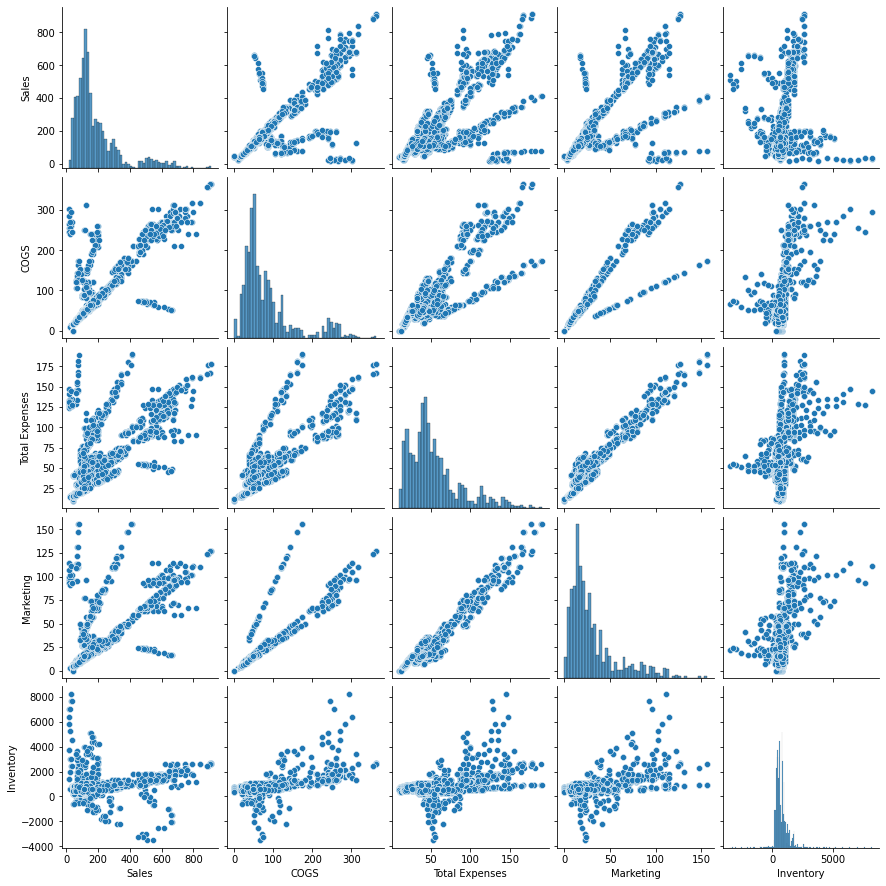

In [153]:
sns.pairplot(df)

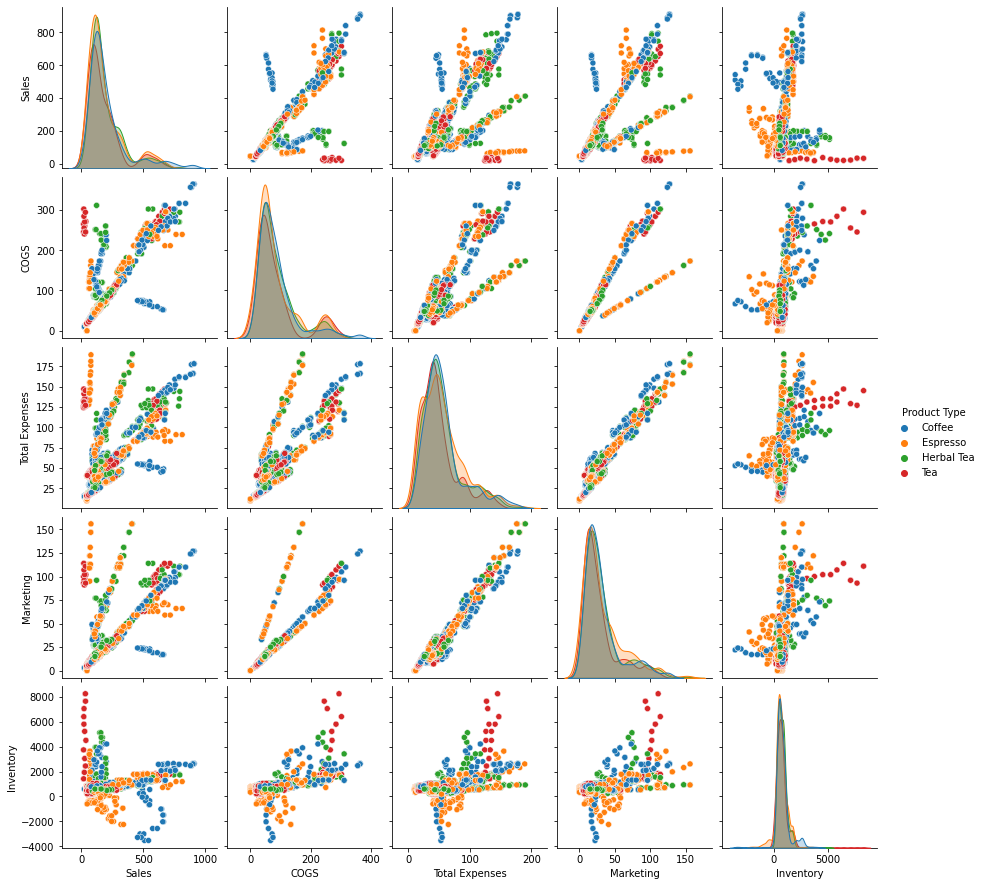

In [154]:
sns.pairplot(df, hue='Product Type')

As we can see in the plots above, some variables may be collinear ('Total Expenses' / 'Marketing', 'COGS' / 'Marketing') which will be later on proved by VIF test.

### Create dummies  

In [155]:
df_dummies=pd.get_dummies(df, drop_first=True)

### Detecting variables collinearity (VIF)

In [156]:
# the independent variables set
X = df_dummies.loc[:, df_dummies.columns !='Sales']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [157]:
vif_data[vif_data["VIF"]<10]

,feature,VIF
0,COGS,4.599208
3,Inventory,1.990990
56,Area Code_475,1.767544
132,Area Code_860,1.803415
152,Area Code_959,1.749554
182,Product Type_Espresso,1.652538
183,Product Type_Herbal Tea,2.281275
184,Product Type_Tea,1.848898
185,Type_Regular,2.256858


As we can see, 'COGS', 'Inventory', 'Area Code', 'Product Type' and 'Type' variables are not collinear and can be taken into the model.

In [158]:
df_dummies_model=pd.get_dummies(df[['COGS', 'Inventory', 'Area Code', 'Product Type', 'Type','Sales']], drop_first=True)

### Statistical Overview

In [159]:
# Number Stats
df_dummies_model.describe()

,COGS,Inventory,Sales,Area Code_206,Area Code_209,Area Code_210,Area Code_212,Area Code_213,Area Code_214,Area Code_216,...,Area Code_970,Area Code_971,Area Code_972,Area Code_978,Area Code_979,Area Code_985,Product Type_Espresso,Product Type_Herbal Tea,Product Type_Tea,Type_Regular
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,...,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,84.433145,749.381356,192.987524,0.018832,0.003766,0.001412,0.002825,0.003296,0.002119,0.002825,...,0.019068,0.020480,0.001177,0.004002,0.001177,0.007062,0.276836,0.248588,0.225989,0.564972
std,67.249769,661.031896,151.133127,0.135949,0.061263,0.037560,0.053081,0.057320,0.045985,0.053081,...,0.136779,0.141653,0.034292,0.063141,0.034292,0.083749,0.447487,0.432245,0.418281,0.495819
min,0.000000,-3534.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,432.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,619.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.000000,910.500000,230.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,364.000000,8252.000000,912.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obviously, Inventory minimum values cannot be negative: it's not possible to happen, because at the moment the inventory is equals zero, the market doesn't have the product phisically to sell. The next step will be to change all negative Inventory values to 0. Also, there is a high standard deviation of the Sales variables which may cause problem building the model. It is necessary to fix it by logarithmization or standardization of the variable. Last but not least, the scales of variables differ significantly (minimum of Sales is 17 and maximum is 912, whereas minimum of Inventory is 0 ("-3534") and maximum is 8252), so there is a need of standardization of the data.



In [160]:
# Converting all negative values of inventory to zero
df_dummies_model['Inventory'] = df_dummies_model['Inventory'].apply(lambda x: x if x >= 0 else 0)
df_dummies_model.describe()

,COGS,Inventory,Sales,Area Code_206,Area Code_209,Area Code_210,Area Code_212,Area Code_213,Area Code_214,Area Code_216,...,Area Code_970,Area Code_971,Area Code_972,Area Code_978,Area Code_979,Area Code_985,Product Type_Espresso,Product Type_Herbal Tea,Product Type_Tea,Type_Regular
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,...,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,84.433145,769.115348,192.987524,0.018832,0.003766,0.001412,0.002825,0.003296,0.002119,0.002825,...,0.019068,0.020480,0.001177,0.004002,0.001177,0.007062,0.276836,0.248588,0.225989,0.564972
std,67.249769,610.080105,151.133127,0.135949,0.061263,0.037560,0.053081,0.057320,0.045985,0.053081,...,0.136779,0.141653,0.034292,0.063141,0.034292,0.083749,0.447487,0.432245,0.418281,0.495819
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,432.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,619.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.000000,910.500000,230.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,364.000000,8252.000000,912.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
# Standardization of data

for col in df_dummies_model.columns:

    df_dummies_model[col] = stats.zscore(df_dummies_model[col])


In [162]:
df_dummies_model.describe()

,COGS,Inventory,Sales,Area Code_206,Area Code_209,Area Code_210,Area Code_212,Area Code_213,Area Code_214,Area Code_216,...,Area Code_970,Area Code_971,Area Code_972,Area Code_978,Area Code_979,Area Code_985,Product Type_Espresso,Product Type_Herbal Tea,Product Type_Tea,Type_Regular
count,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,...,4.248000e+03,4248.000000,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03
mean,2.676244e-17,-3.345305e-17,6.690610e-17,5.352488e-17,-6.690610e-18,-3.345305e-18,-3.345305e-18,-2.341713e-17,1.003591e-17,1.338122e-17,...,-6.690610e-17,0.000000,-3.345305e-18,-2.007183e-17,-3.345305e-18,6.690610e-18,2.341713e-17,-4.181631e-17,-2.007183e-17,1.003591e-17
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,...,1.000118e+00,1.000118,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00
min,-1.255664e+00,-1.260828e+00,-1.164591e+00,-1.385419e-01,-6.148755e-02,-3.760887e-02,-5.322463e-02,-5.750275e-02,-4.607757e-02,-5.322463e-02,...,-1.394218e-01,-0.144597,-3.432800e-02,-6.338740e-02,-3.432800e-02,-8.433490e-02,-6.187184e-01,-5.751757e-01,-5.403432e-01,-1.139606e+00
25%,-6.161809e-01,-5.526406e-01,-6.153414e-01,-1.385419e-01,-6.148755e-02,-3.760887e-02,-5.322463e-02,-5.750275e-02,-4.607757e-02,-5.322463e-02,...,-1.394218e-01,-0.144597,-3.432800e-02,-6.338740e-02,-3.432800e-02,-8.433490e-02,-6.187184e-01,-5.751757e-01,-5.403432e-01,-1.139606e+00
50%,-3.633622e-01,-2.460874e-01,-3.638778e-01,-1.385419e-01,-6.148755e-02,-3.760887e-02,-5.322463e-02,-5.750275e-02,-4.607757e-02,-5.322463e-02,...,-1.394218e-01,-0.144597,-3.432800e-02,-6.338740e-02,-3.432800e-02,-8.433490e-02,-6.187184e-01,-5.751757e-01,-5.403432e-01,8.774964e-01
75%,2.315054e-01,2.317750e-01,2.449287e-01,-1.385419e-01,-6.148755e-02,-3.760887e-02,-5.322463e-02,-5.750275e-02,-4.607757e-02,-5.322463e-02,...,-1.394218e-01,-0.144597,-3.432800e-02,-6.338740e-02,-3.432800e-02,-8.433490e-02,1.616244e+00,-5.751757e-01,-5.403432e-01,8.774964e-01
max,4.157632e+00,1.226686e+01,4.758038e+00,7.218033e+00,1.626346e+01,2.658947e+01,1.878829e+01,1.739047e+01,2.170253e+01,1.878829e+01,...,7.172478e+00,6.915749,2.913074e+01,1.577601e+01,2.913074e+01,1.185749e+01,1.616244e+00,1.738599e+00,1.850676e+00,8.774964e-01


In [163]:
corr=df.corr()
corr

,Sales,COGS,Total Expenses,Marketing,Inventory
Sales,1.000000,0.886651,0.689350,0.710515,0.325934
COGS,0.886651,1.000000,0.782534,0.818271,0.621086
Total Expenses,0.689350,0.782534,1.000000,0.966167,0.433708
Marketing,0.710515,0.818271,0.966167,1.000000,0.497764
Inventory,0.325934,0.621086,0.433708,0.497764,1.000000


<AxesSubplot: >

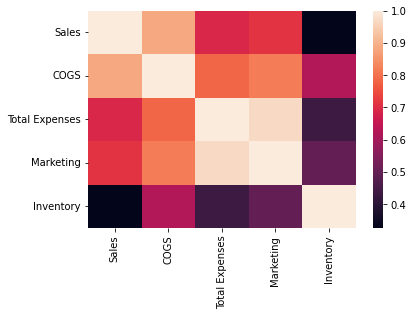

In [164]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Build data models

#### Train, test and validation split

In [169]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_dummies_model[['COGS','Inventory','Area Code_475','Area Code_860','Area Code_959','Product Type_Espresso','Product Type_Herbal Tea','Product Type_Tea','Type_Regular','Sales']], target = 'Sales', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3398, 9)
(3398,)
(425, 9)
(425,)
(425, 9)
(425,)


(None, None)

#### Linear regression

In [170]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.866857388669673
intercept: 0.00451673434251049
slope: [ 1.14141012 -0.37115969  0.01017341  0.00580737  0.01185755 -0.04691399
 -0.03745093 -0.04794068  0.01698426]


#### Decision tree

In [173]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [174]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

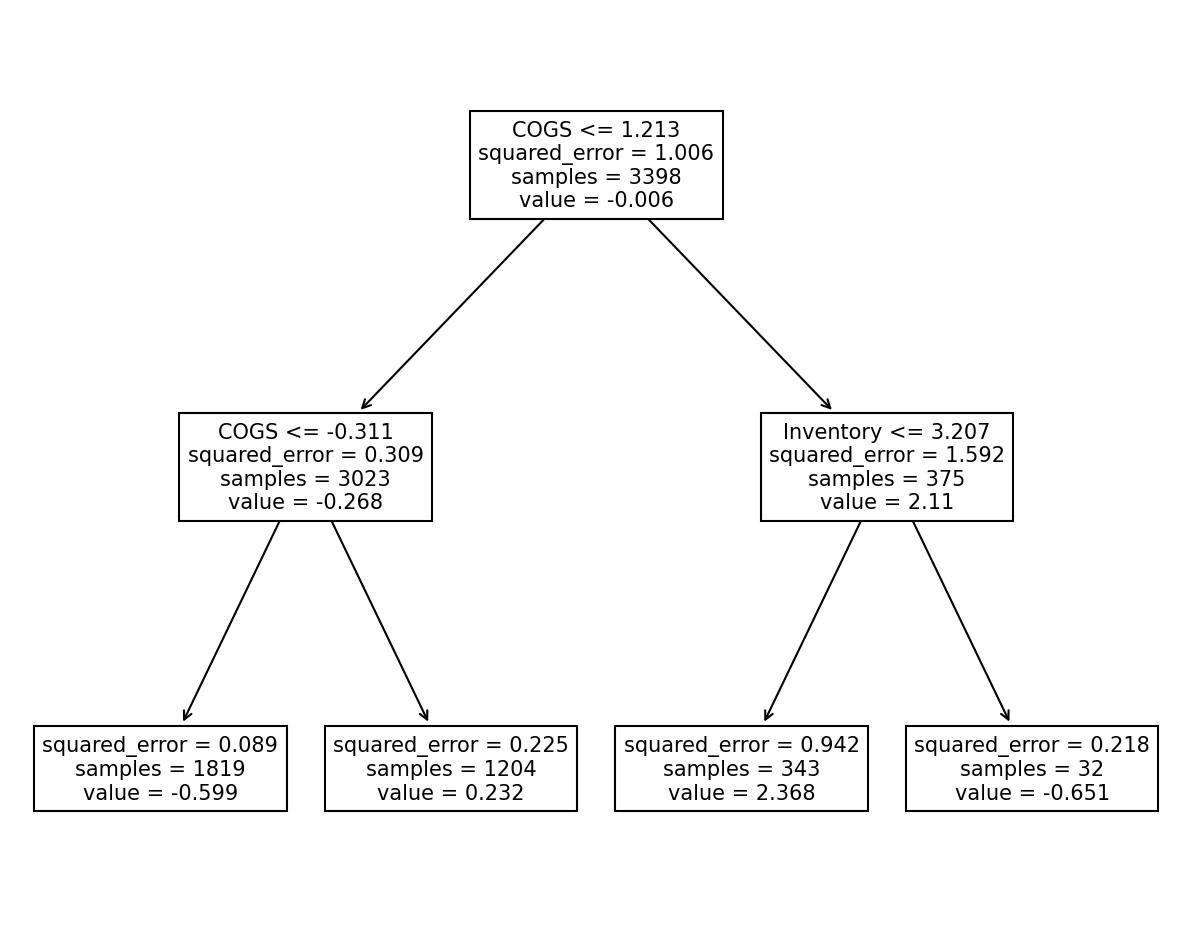

In [189]:
# Plot the results
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(regr_1, feature_names=X_test.columns, fontsize=10);


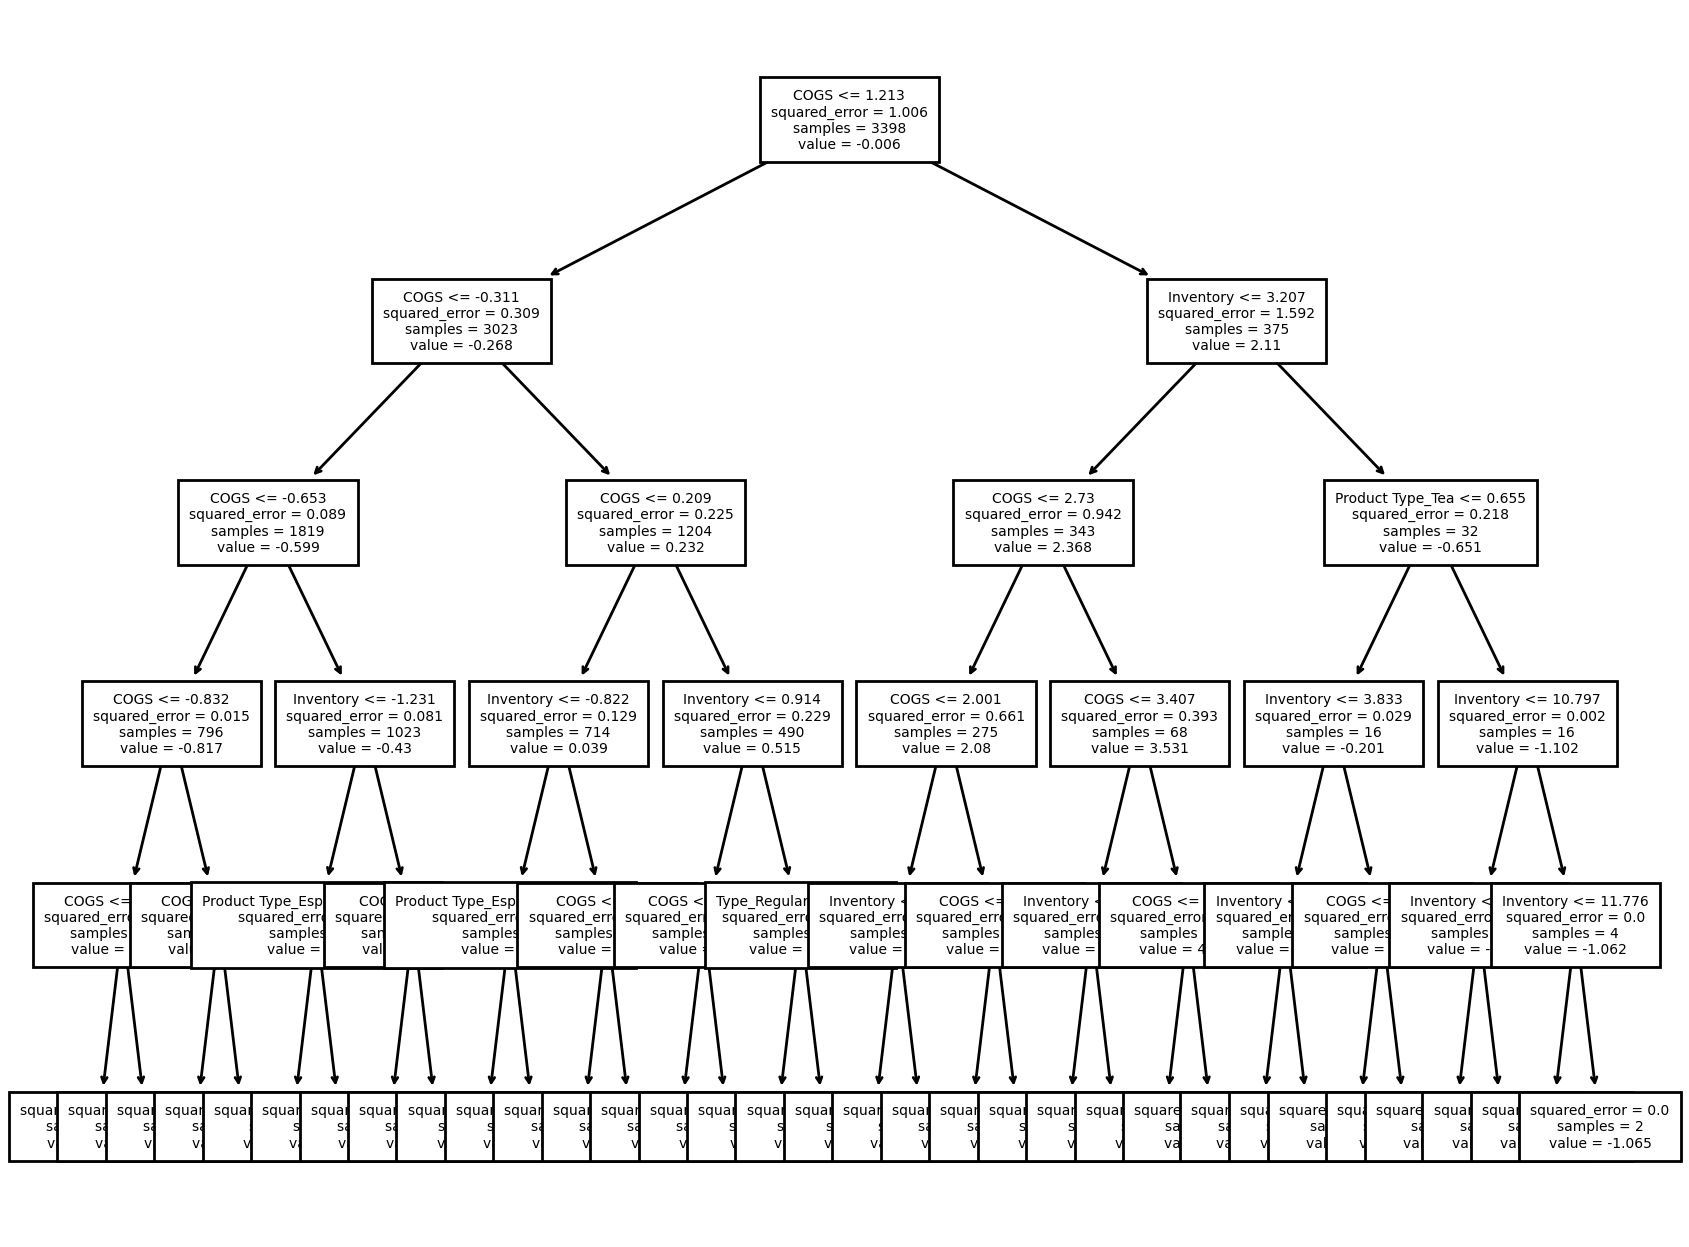

In [191]:
plt.figure(figsize=(10,8), dpi=200)
plot_tree(regr_2, feature_names=X_test.columns, fontsize=5);